# Prueba Intertrimestral

Nombre y Apellidos:

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [87]:
import pandas as pd
import numpy as np
import sklearn.datasets

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression

from scipy.stats import ttest_ind

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [88]:
def mapa_logistico(r, x_n):
    return r * x_n * (1 - x_n)


mapa_logistico(1.45, 6)

-43.5

b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [89]:
# def lista_logistica(n, r):
#     lista = []
#     print(lista)
#     for i in range(n):
#         # print(i)
#         lista.append(mapa_logistico(r, i))

#     return lista


def lista_logistica(n, r, x0):
    lista = [x0]
    for i in range(n-1):
        lista.append(mapa_logistico(r, lista[-1]))

    return lista


print(lista_logistica(10, 0.25, 0.2))



[0.2, 0.04000000000000001, 0.009600000000000001, 0.00237696, 0.0005928275152896, 0.0001481190177066789, 3.7024269615818126e-05, 9.255724704819386e-06, 2.313909759094894e-06, 5.784761012291301e-07]


c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

In [90]:
r_values = np.arange(0, 4.25, 0.25)  
x0 = 0.2  
n_iterations = 10  

results = []

for r in r_values:
    x = x0
    for n in range(n_iterations):
        x_next = mapa_logistico(r, x)
        results.append((r, n, x_next))
        x = x_next

df = pd.DataFrame(results, columns=['r', 'n', 'x_n+1'])

print(df.head(10))

     r  n  x_n+1
0  0.0  0    0.0
1  0.0  1    0.0
2  0.0  2    0.0
3  0.0  3    0.0
4  0.0  4    0.0
5  0.0  5    0.0
6  0.0  6    0.0
7  0.0  7    0.0
8  0.0  8    0.0
9  0.0  9    0.0


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [91]:
df = pd.read_csv("Walmart.csv", encoding='ISO-8859-1')

print(df.head())
print(df.tail())

# print(df.describe())

# print(df.isnull().sum())



   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53

In [92]:
print('El dataset muestra las ventas semanales para diversas tiendas de la empresa de grandes almacenes Walmart en distintas fechas')
print('A estos datos le acompañan otras medidas económicas o de interés que podrían estar relacionadas con las ventas, ') 
print('como son el IPC, el desempleo, si incluye festivos la semana, la temperatura o el precio del carburante')

El dataset muestra las ventas semanales para diversas tiendas de la empresa de grandes almacenes Walmart en distintas fechas
A estos datos le acompañan otras medidas económicas o de interés que podrían estar relacionadas con las ventas, 
como son el IPC, el desempleo, si incluye festivos la semana, la temperatura o el precio del carburante


In [93]:
print('Número de tiendas en el dataset: ' + str(df['Store'].nunique()))
print('Ventas semanales medias: ' + str(df['Weekly_Sales'].mean()))

Número de tiendas en el dataset: 45
Ventas semanales medias: 1046964.8775617715


In [94]:
print(df.describe())


             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6434.000000  
mean    171.578394      7.999047  
std      39.356712      1.876012  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [95]:
print(df.isnull().sum())
# Hay un null en unemployment

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64



b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)


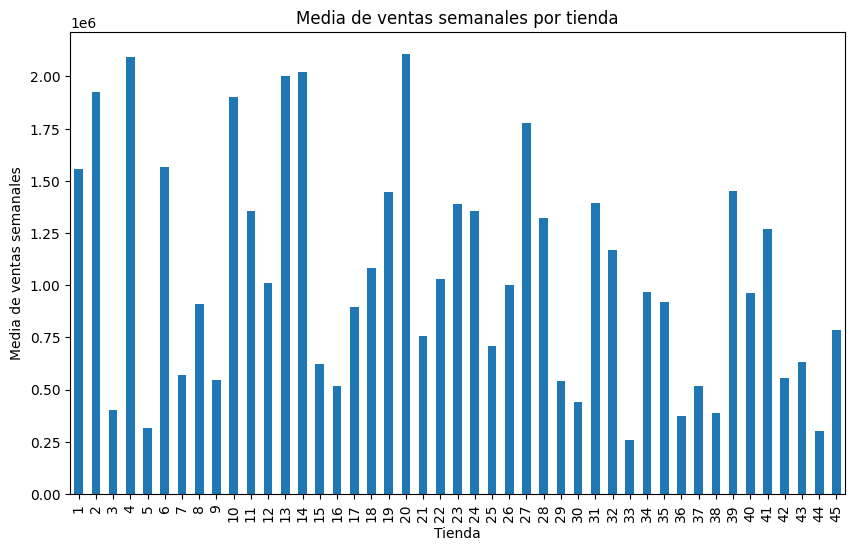

Número de tiendas: 45
La tienda con las ventas promedio más altas es la 20 con un promedio de 2107676.8703496503
La tienda con las ventas promedio más bajas es la 33 con un promedio de 259861.69202797202


In [96]:
ventas_por_tienda = df.groupby('Store')['Weekly_Sales'].mean()

plt.figure(figsize=(10,6))
ventas_por_tienda.plot(kind='bar')
plt.title('Media de ventas semanales por tienda')
plt.xlabel('Tienda')
plt.ylabel('Media de ventas semanales')
plt.show()

tienda_mas_alta = ventas_por_tienda.idxmax()
tienda_mas_baja = ventas_por_tienda.idxmin()

print(f'Número de tiendas: ' + str(ventas_por_tienda.count()))
print(f'La tienda con las ventas promedio más altas es la {tienda_mas_alta} con un promedio de {ventas_por_tienda.max()}')
print(f'La tienda con las ventas promedio más bajas es la {tienda_mas_baja} con un promedio de {ventas_por_tienda.min()}')

c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

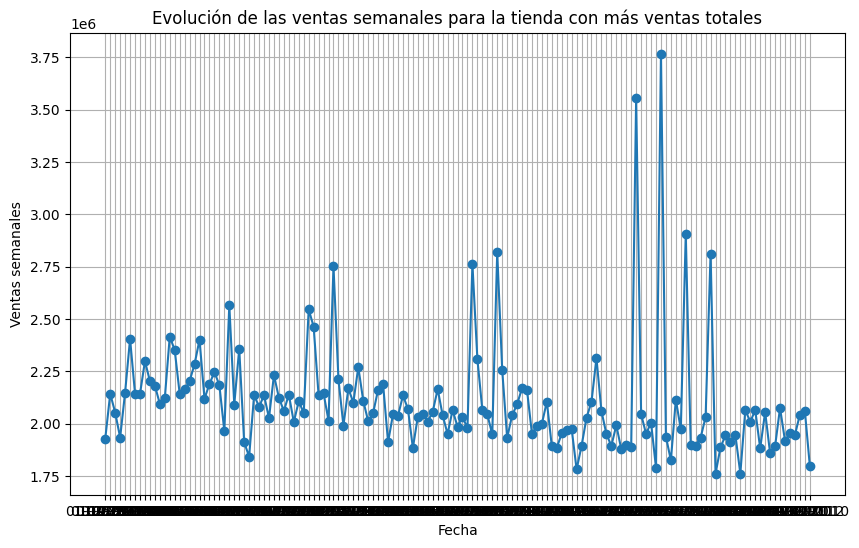

Se ve una tendencia a la baja y varios outliers de vez en cuando. 


In [97]:
tienda_con_mas_ventas = df.groupby('Store')['Weekly_Sales'].sum().idxmax()

ventas_tienda = df[df['Store'] == tienda_con_mas_ventas].sort_values(by='Date')


plt.figure(figsize=(10,6))
plt.plot(ventas_tienda['Date'], ventas_tienda['Weekly_Sales'], marker='o')
plt.title('Evolución de las ventas semanales para la tienda con más ventas totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')
plt.grid(True)
plt.show()


print(f'Se ve una tendencia a la baja y varios outliers de vez en cuando. ')

# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

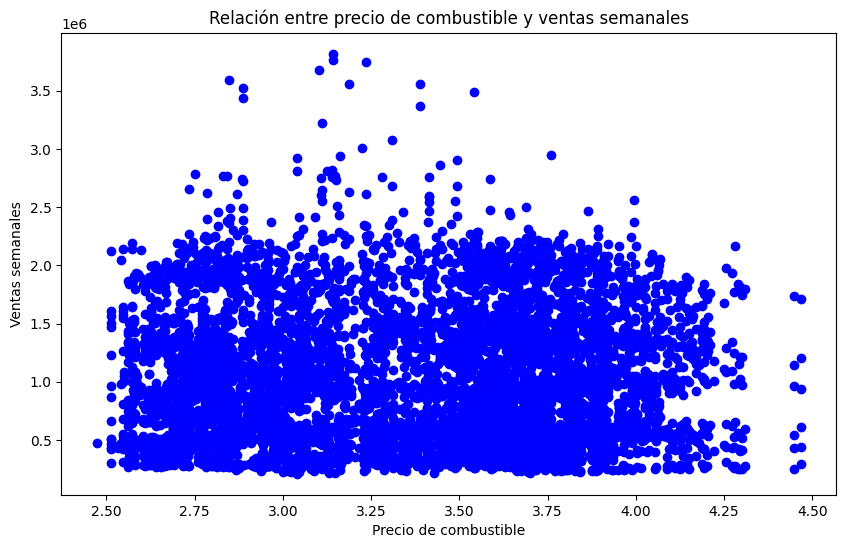

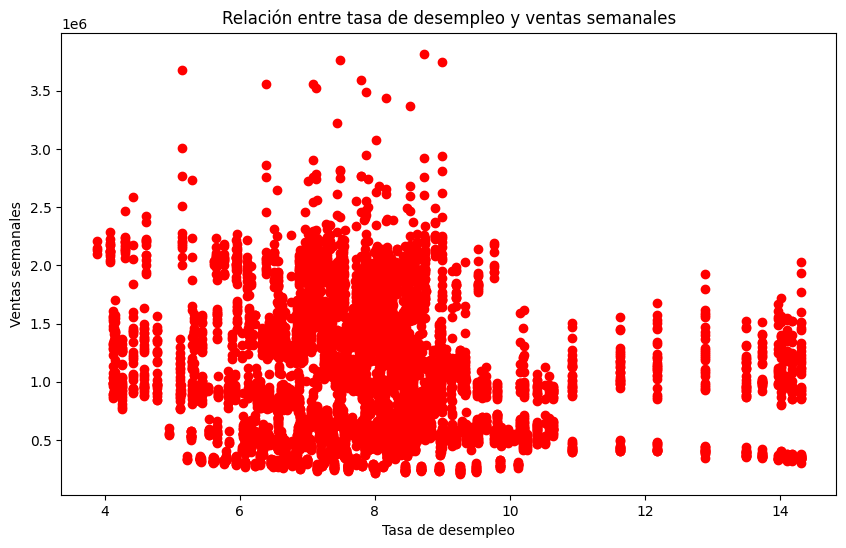

Coeficiente de correlación entre precio de combustible y ventas semanales: 0.009463786314475135
Coeficiente de correlación entre tasa de desempleo y ventas semanales: -0.10614768999329721
Tanto en los scatter plot como en los coeficientes de correlación, se ve cómo las variables están poco relacionadas con las ventas semanales
Cuando toman valores bajos, especialmente el desempleo, existen observaciones por encima de la media y mediana (a ojo)
pero no lo suficiente como para asegurar una correlación lo suficientemente fuerte


In [98]:
# Gráfico de dispersión para precio de combustible y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], c='blue', marker='o')
plt.xlabel('Precio de combustible')
plt.ylabel('Ventas semanales')
plt.title('Relación entre precio de combustible y ventas semanales')
plt.show()

# Gráfico de dispersión para tasa de desempleo y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('Tasa de desempleo')
plt.ylabel('Ventas semanales')
plt.title('Relación entre tasa de desempleo y ventas semanales')
plt.show()


# Calcular coeficiente de correlación de Pearson
correlacion_fuel_price = df['Fuel_Price'].corr(df['Weekly_Sales'])
correlacion_unemployment = df['Unemployment'].corr(df['Weekly_Sales'])

print('Coeficiente de correlación entre precio de combustible y ventas semanales:', correlacion_fuel_price)
print('Coeficiente de correlación entre tasa de desempleo y ventas semanales:', correlacion_unemployment)

print('Tanto en los scatter plot como en los coeficientes de correlación, se ve cómo las variables están poco relacionadas con las ventas semanales')
print('Cuando toman valores bajos, especialmente el desempleo, existen observaciones por encima de la media y mediana (a ojo)')
print('pero no lo suficiente como para asegurar una correlación lo suficientemente fuerte')


c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


In [99]:
ventas_promedio = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
# print('Ventas promedio: ' + str(ventas_promedio))

diferencia_promedio = ventas_promedio[1] - ventas_promedio[0]
print('Diferencia promedio' + str(round(diferencia_promedio, 2)))

print('Existe una diferencia de un ' + str(round((ventas_promedio[1]/ventas_promedio[0] - 1)*100,2)) + '%, en favor de las semanas festivas')

ventas_festivas = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
ventas_no_festivas = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

# This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. 
t_stat, p_valor = ttest_ind(ventas_festivas, ventas_no_festivas, equal_var=False)
print('t-stat:', round(t_stat, 2))
print('p-valor:', round(p_valor, 4))

print('p-valor ~ 0 (<0.01) -> Se rechaza la hipótesis nula para todo nivel de significación habitual')
print("""Se puede afirmar que 'Existe una diferencia estdísticamente significativa' entre los promedios de los grupos""")


Diferencia promedio81631.51
Existe una diferencia de un 7.84%, en favor de las semanas festivas
t-stat: 2.68
p-valor: 0.0076
p-valor ~ 0 (<0.01) -> Se rechaza la hipótesis nula para todo nivel de significación habitual
Se puede afirmar que 'Existe una diferencia estdísticamente significativa' entre los promedios de los grupos


# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [100]:
# Empiezo con un corrplot para explorar, quitando la columna de fechas:
print(df.select_dtypes(include=['number']).corr())
px.imshow(df.select_dtypes(include=['number']).corr())

# No se encuentra mucha correlación lineal con las ventas, las variables que más tienen son la tienda y el desempleo

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.735625e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.735625e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.234896e-01     -0.106148  1.097563e-02     0.101172   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223490  
Weekly_Sales    0.009464 -0.072634     -0.106148  
Holiday_Flag   -0.078347 -0.002162      0.010976  
Temperature     0.144982  0.176888      0.101172  
Fuel_Price      1.000000 -0.170642     -0.034762  
CPI            -0.170642  1.000000     -0.302059  
Unemployment   -0.034762 -0.302059      1.000000  


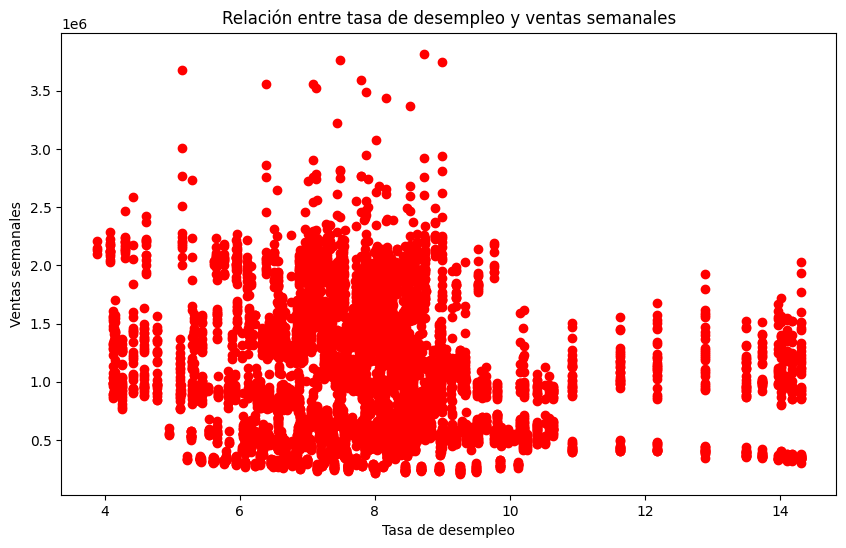

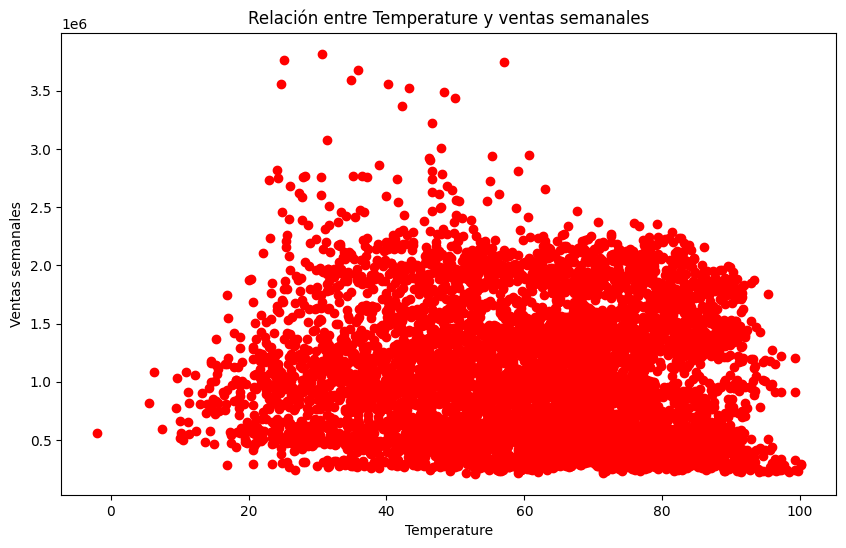

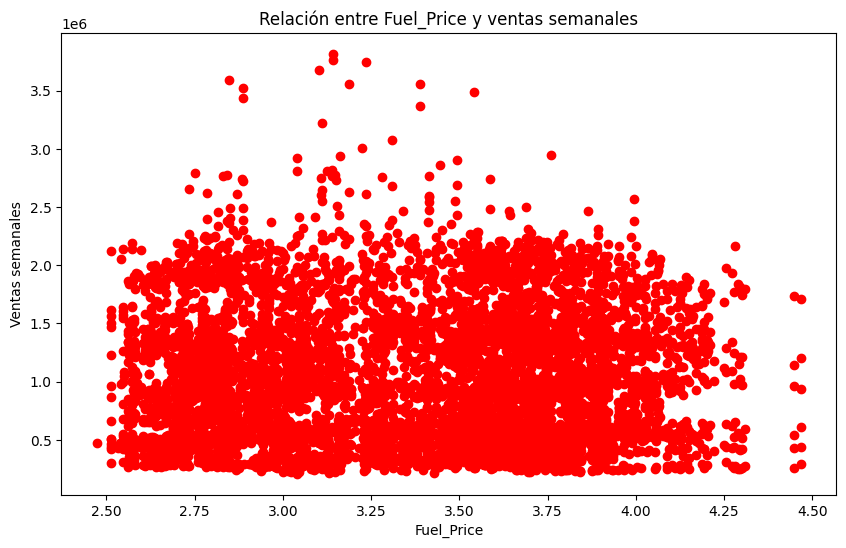

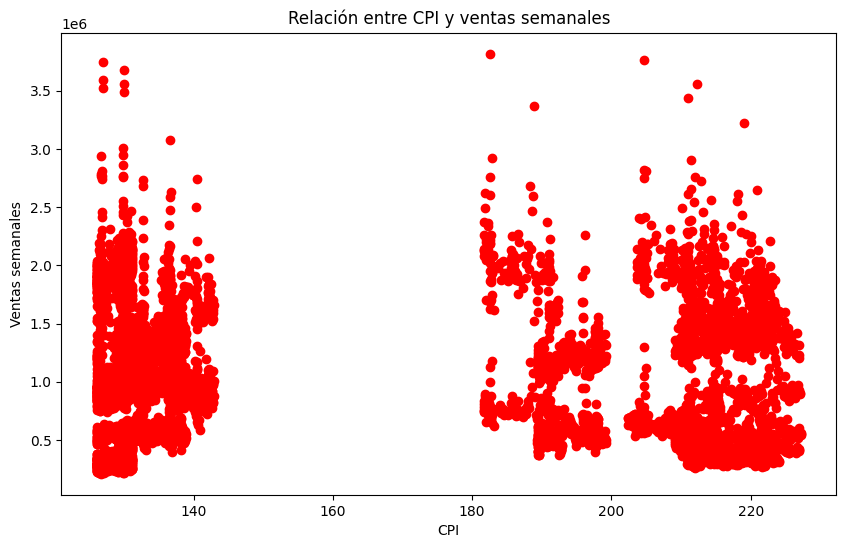

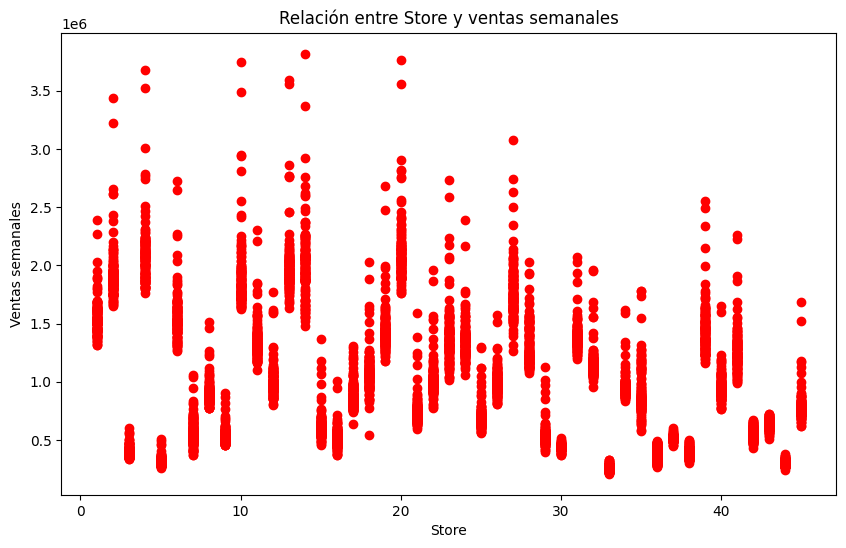

In [101]:
# Varios scatter para hacerme más a la idea

# Gráfico de dispersión para tasa de desempleo y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Unemployment'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('Tasa de desempleo')
plt.ylabel('Ventas semanales')
plt.title('Relación entre tasa de desempleo y ventas semanales')
plt.show()

# Holiday_Flag es dicotómica, y ya la hemos explorado con las medias y el test

# Gráfico de dispersión para tasa de Temperature y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('Temperature')
plt.ylabel('Ventas semanales')
plt.title('Relación entre Temperature y ventas semanales')
plt.show()

# Gráfico de dispersión para tasa de Fuel_Price y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('Fuel_Price')
plt.ylabel('Ventas semanales')
plt.title('Relación entre Fuel_Price y ventas semanales')
plt.show()

# Gráfico de dispersión para tasa de CPI y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['CPI'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('CPI')
plt.ylabel('Ventas semanales')
plt.title('Relación entre CPI y ventas semanales')
plt.show()

# Gráfico de dispersión para tasa de Store y ventas semanales
plt.figure(figsize=(10,6))
plt.scatter(df['Store'], df['Weekly_Sales'], c='red', marker='o')
plt.xlabel('Store')
plt.ylabel('Ventas semanales')
plt.title('Relación entre Store y ventas semanales')
plt.show()

In [102]:
# Cargar los datos
df = pd.read_csv("Walmart.csv", encoding='ISO-8859-1')
df_modelo = df.select_dtypes(include=['number']) # Elimino fechas
df_modelo = df_modelo[df_modelo['Unemployment'].notna()] # Elimino el NA

# Seleccionar las variables predictoras y la variable objetivo
X = df_modelo.drop(['Weekly_Sales'], axis=1)  # Variables predictoras
y = df_modelo['Weekly_Sales']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal con todas las variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)
print("Modelo con todas las variables: MSE = {:.2f}, R² = {:.2f}".format(mse_all, r2_all))

# Entrenar un modelo de regresión lineal con una selección de variables
model_selected = LinearRegression()
model_selected.fit(X_train[['Holiday_Flag', 'Unemployment']], y_train)
y_pred_selected = model_selected.predict(X_test[['Holiday_Flag', 'Unemployment']])
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)
print("Modelo con variables seleccionadas: MSE = {:.2f}, R² = {:.2f}".format(mse_selected, r2_selected))

Modelo con todas las variables: MSE = 275179032400.19, R² = 0.15
Modelo con variables seleccionadas: MSE = 320878973523.47, R² = 0.01


In [103]:
# Cargar los datos
df = pd.read_csv("Walmart.csv", encoding='ISO-8859-1')

# Convertir la variable Store en una variable categórica
df['Store'] = pd.Categorical(df['Store'])

# Crear variables binarias para cada categoría de la variable Store
df_store_dummies = pd.get_dummies(df['Store'], prefix='Store')

# Concatenar las variables binarias con el resto de las variables
df = pd.concat([df, df_store_dummies], axis=1)

# Eliminar la variable original Store
df = df.drop('Store', axis=1)

# Resto del código...
df_modelo = df.select_dtypes(include=['number']) # Elimino fechas
df_modelo = df_modelo[df_modelo['Unemployment'].notna()] # Elimino el NA

# Seleccionar las variables predictoras y la variable objetivo
X = df_modelo.drop(['Weekly_Sales'], axis=1)  # Variables predictoras
y = df_modelo['Weekly_Sales']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal con todas las variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)
y_pred_all = model_all.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)
print("Modelo con todas las variables: MSE = {:.2f}, R² = {:.2f}".format(mse_all, r2_all)) # Tremenda castaña

Modelo con todas las variables: MSE = 317184412045.48, R² = 0.02


b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [104]:
print('Se ha podido comprobar que el modelo que incluye todas las variables performa mucho mejor que cualquier otro')
print('Incluso convertir la variable Store a categórica es dañino...')

Se ha podido comprobar que el modelo que incluye todas las variables performa mucho mejor que cualquier otro
Incluso convertir la variable Store a categórica es dañino


# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

A pesar de que el dataset es muy interesante y se puede observar alguna relación tácita de las ventas semanales con otras variables,
los datos disponibles resultan no ser suficientes para predecir las ventas. La mejor R^2 encontrada es de 0.15, lo cual es poco más
que un paseo aleatorio, por lo que se recomienda recopilar otras variables de interés, explorar más en detalle el motivo de
los outliers o probar otras familias de modelos predictivos.

Esto ha sido la conclusión, para más detalles, se ha de mirar paso a paso la evolución del tratamiento del dataset.